<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 1
#### Ana Nuñez


# Consigna
Dado el siguiente circuito:
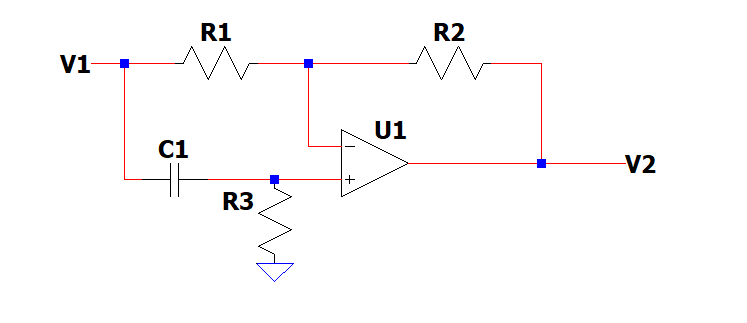

1. Obtener la función transferencia V2V1 ( módulo , fase y diagrama de polos y ceros).
2. ¿Qué tipo de filtro es?
3. Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?
4. Simule la función transferencia normalizada (Python, Matlab, etc.).
5. Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2/R1=1; R3=1kΩ y C=1µF
6. ¿Qué utilidad podría tener este tipo de circuitos?

### Bonus:

+1 💎 Obtener una RED normalizada que responda a la función hallada en 3)

+1 🎓 Verifique los resultados de 1 y 2 mediante el módulo de simulación simbólica SymPy.

+1 🤯 Presentación en jupyter notebook


# Obtención de la función transferencia

Como primer paso, se marcaron todas las relaciones de corrientes y tensiones que se consideraron pertinentes para el ejercicio.

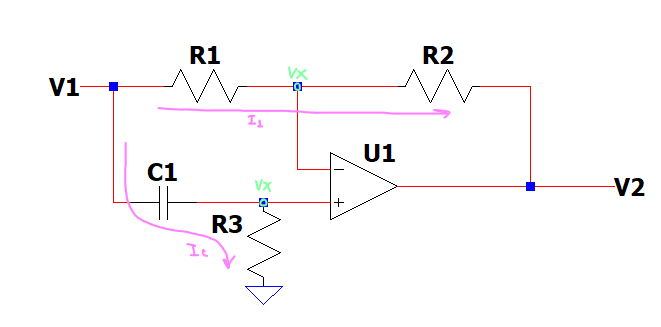 

Luego se plantearon las ecuaciones que se muestran a continuación, con el objetivo de encontrar el valor de Vx y de esa forma encontrar la transferencia del circuito, V2/V1

\begin{equation}
  \frac{V_1 - V_x}{R1} = \frac{V_x - V_2}{R2}
\end{equation}

\begin{equation}
  (V_1 - V_x) \cdot SC = \frac{V_x}{R3}
\end{equation}

A partir de esta última se encontró la relación entre $V_1$ y $V_x$

\begin{equation}
  V_x = \frac{V_1 \cdot SC}{\frac{1}{R3} + SC} = \frac{V_1 \cdot S}{S + \frac{1}{R3 \cdot C}}
\end{equation}

Trabajando la primer ecuación y reemplazando $V_x$ por lo obtenido en la ecuación anterior, se llegó a la siguiente relación

\begin{equation}
  V_2 = V_1 \cdot (\frac{S}{S + \frac{1}{R3 \cdot C}} - \frac{R2}{R1}\cdot\frac{\frac{1}{R3 \cdot C}}{S + \frac{1}{R3 \cdot C}})
\end{equation}

Finalmente, 

\begin{equation}
  T(S) = \frac{V_2}{V_1} =\frac{S - \frac{R2}{R1} \cdot \frac{1}{R3 \cdot C}}{S + \frac{1}{R3 \cdot C}}
\end{equation}


Para hacer el cálculo del módulo, se evalua T(S) cuando $S = j\omega$

\begin{equation}
  T(\omega) = \frac{j\omega - \frac{R2}{R1} \cdot \frac{1}{R3 \cdot C}}{j\omega + \frac{1}{R3 \cdot C}}
\end{equation}

\begin{equation}
  |T(\omega)| = \frac{\sqrt{\omega^2 + (\frac{R2}{R1} \cdot \frac{1}{R3 \cdot C})^2}}{\sqrt{\omega^2 + (\frac{1}{R3 \cdot C})^2}}
\end{equation}

Luego la fase,

\begin{equation}
  \measuredangle T(\omega) = - \arctan ( \frac{\omega \cdot R1 \cdot R3 \cdot C}{R2}) - \arctan (\omega \cdot R3 \cdot C)
\end{equation}





# Diagrama de polos y ceros

Una vez obtenida la transferencia, su módulo y su fase, se hizo el diagrama de polos y ceros para los tres casos posibles

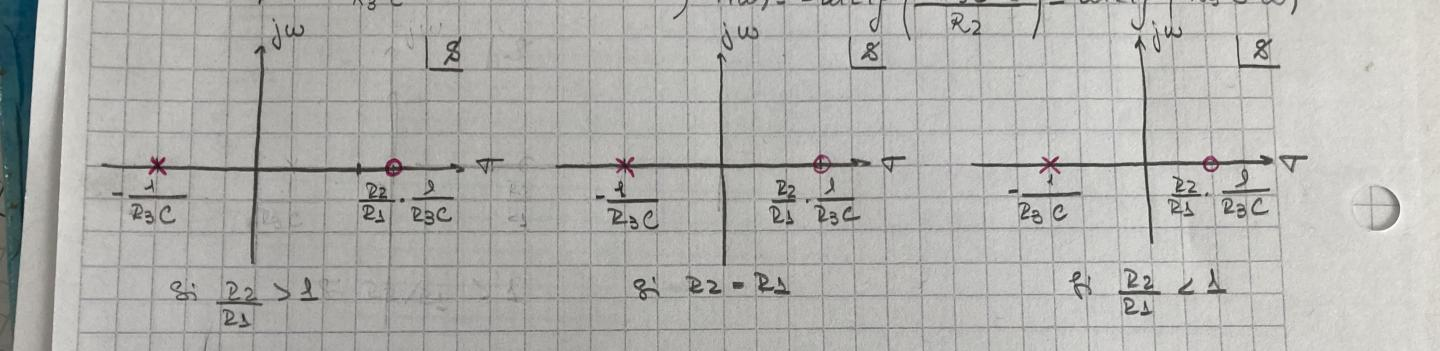



# Clasificación del filtro

A partir de lo calculado, se deduce que se trata de un filtro pasa todo. En el caso de que R1 = R2, $\hspace{0.5cm} |T(\omega)| = 1 \hspace{0.5cm} \forall \omega $.

Sin embargo, cuando $R2 \neq R1$ el filtro atenuará (R2 < R1) o amplificará (R2 > R1) la señal hasta que $\omega >> R2/R1$

# Normalización en frecuencia

Se elije $\Omega_\omega = \frac {1}{R3 \cdot C}$ con el objetivo de normalizar $\omega_p$

\begin{equation}
  \Omega_\omega = \frac{1}{R3 \cdot C} \rightarrow $ = \frac{S}{\Omega_\omega} = S \cdot R3 \cdot C
\end{equation}

\begin{equation}
  T($) =\frac{$ - \frac{R2}{R1}}{$ + 1}
\end{equation}

Una vez normalizada, se puede observar con mayor claridad que la variación en la ganancia del sistema dependerá únicamente de sus ceros, es decir de la relación entre los componentes R1 y R2.

# Simulación de la función transferencia normalizada 

Se simuló la transferencia normalizada en Python para distintas relaciones de R2/R1, a continuacion se muestra el código y los resultados de la simulación.


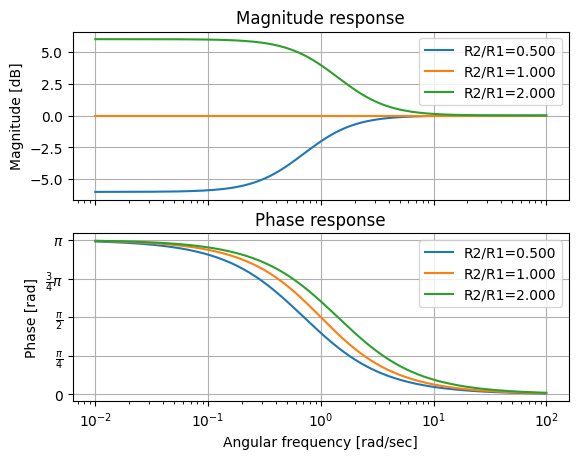

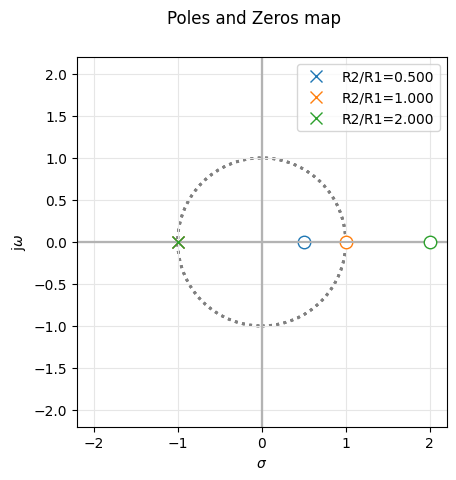

In [1]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 1

plt.close('all')

R1 = 1
R2 = [ 0.5, 1, 2]

for qq in range(len(R2)):
    
    my_tf = TransferFunction( [1, -(R2[qq]/R1)*w0], [1, w0] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'R2/R1={:3.3f}'.format(R2[qq]/R1) )
    
    pzmap(my_tf, fig_id=2, filter_description = 'R2/R1={:3.3f}'.format(R2[qq]/R1)) #S plane pole/zero plot

# Simulación de la transferencia para valores específicos

Se realizó la simulación para R2/R1 = 1, R3 = 1kΩ y C = 1µF y se obtuvieron los siguientes resultados

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

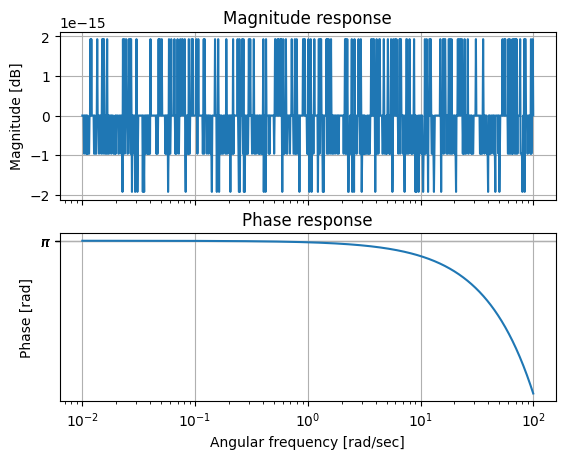

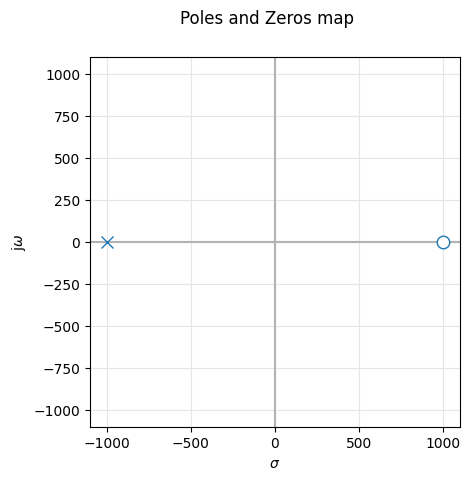

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

R1 = 1
R2 = 1
R3 = 1000
C = 1e-6

w0 = 1/(R3*C)

plt.close('all')
    
my_tf = TransferFunction( [1, -(R2/R1)*w0], [1, w0] )
    
bodePlot(my_tf, fig_id=1)
    
pzmap(my_tf, fig_id=2) #S plane pole/zero plot
    
    

En el gráfico de magnitud se puede observar que la variación se encuentra entre $-2x10^{-15}$ y $2x10^{-15}$, este leve error se le puede atribuir al redondeo del programa.

# Conclusión

Utilizando los gráficos de módulo y fase obtenidos en la simulación anterior se puede ver que la mayor utilidad del circuito reside en el cambio de fase ya que la magnitud de la señal será la misma.

# Cambios

Jugue un poco con los titulos y las ecuaciones en la parte de *Introduccion*, despues cambie w0 = 2 en vez de 1 y $ qq = \frac{\sqrt{3}}{2} $

recien tuve que buscar [cómo usar Latex](https://manualdelatex.com/tutoriales/ecuaciones#seccion3) para escribir lo de arriba :p